In [54]:
from sklearn.metrics import  accuracy_score
from sklearn.datasets import load_iris
from itertools import combinations
import numpy as np
import pandas as pd
import seaborn as sn

In [55]:
data = pd.read_csv('data/Electricity-problem/electricity-normalized.csv')

In [56]:
class logisticregression():
    def __init__(self,train_data,train_labels,lr=0.01,batch_size=None,epoch=10,print_every = 10):
        dummy_once = np.ones((len(train_data),1))
        self.train_data = np.hstack((dummy_once,train_data))
        self.train_labels = train_labels
        
        self.params = np.zeros((len(self.train_data[0]),1))
        
        self.lr = lr
        self.epoch = epoch
        self.batch_size = batch_size
        self.print_every = print_every
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def cost(self,y,y_pred):
        return -np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
    
    def gradient(self,y,y_pred,x):
        return np.dot(x.T,(y_pred-y))
    
    def train(self):
        for i in range(self.epoch):
            y_pred = self.sigmoid(np.dot(self.train_data,self.params))
            loss = self.cost(self.train_labels,y_pred)
            
            gra = self.gradient(self.train_labels,y_pred,self.train_data)
            
            self.params -= self.lr*gra
            
            if self.print_every:
                if i%self.print_every == 0 or i == self.epoch-1:
                    print('Epoch : {}  Loss: {}'.format(i,loss))
    def predict(self,test_data):
        result = self.sigmoid(np.dot(test_data,self.params[1:])+self.params[0])
        result[result >= 0.5 ] = 1
        result[result < 0.5 ] = 0
        return result
    
    def evaluate(self,test_data,labels):
        accuracy = accuracy_score(self.predict(test_data),labels)
        return accuracy

In [57]:
def get_combinations(items,number):
    comb_list = []
    for c in combinations(items, number):
        c = list(c)
        c.sort()
        comb_list.append(c)
        
    return comb_list

In [115]:
def wrapper_helper(data,feature_names,target_name,train_size = 0.6,test_size = 0.4):
    dataset = data[:-1].copy()
    target = data[:-1]
    
    final_data = np.hstack((dataset,target))
    np.random.shuffle(final_data)
    
    pd_data = pd.DataFrame(final_data)
    pd_data.columns= feature_names
    pd_data = pd_data[(pd_data['target']==0) | (pd_data['target']==1)]
    pd_data.tail(2)
    

    col_names = np.concatenate((feature_names,target_name),axis=None)
    final_data = pd_data[col_names].values

    train_data = final_data[:int(len(final_data)*train_size)]
    test_data = final_data[:int(len(final_data)*test_size)]

    train_data.shape,test_data.shape 
    
    X_train = train_data[:,:-1]
    y_train = train_data[:,-1:]


    X_test = test_data[:,:-1]
    y_test = test_data[:,-1:]


    return X_train,y_train,X_test,y_test

In [142]:
def wrapper_method(data,names,k=2):
    classes = get_combinations(names,k)
    wrapper_output = {}
    
    for i in classes:
        X_train,y_train,X_test,y_test = wrapper_helper(data,i,['target'])
        print(len(X_train[0]))
        
        logistic = logisticregression(X_train,y_train,epoch=10,print_every=None)
        logistic.train()
        
        result = logistic.evaluate(X_test,y_test)
        wrapper_output[str(i)] = result
        
        
        
    return wrapper_output

In [143]:
train_size = 0.6
test_size = 0.4

In [144]:
data.head(2)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,target_class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP,1
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP,1


In [145]:
data['target_class']=data['class'].apply(lambda x: 1 if x.lower()=='up' else 0)

In [146]:
data.tail(3)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,target_class
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN,0
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP,1
45311,0.9158,7,1.000000,0.050679,0.288753,0.003542,0.355256,0.231140,DOWN,0


In [147]:
data.columns

Index(['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice',
       'vicdemand', 'transfer', 'class', 'target_class'],
      dtype='object')

In [148]:
dataset = data[['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice','vicdemand', 'transfer', 'target_class']].values

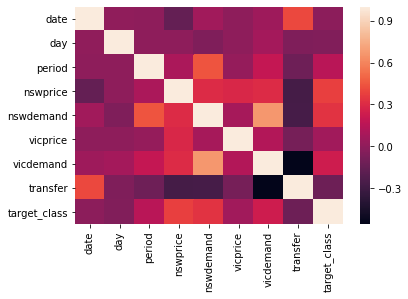

In [149]:
sn.heatmap(data.corr())

In [150]:
col_names = ['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice','vicdemand', 'transfer', 'target_class']

In [151]:
# wrapper_helper(dataset,col_names,['target_class'])

In [152]:
wrapper_method(dataset,col_names,1)

8
8
8
8


/home/aims/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/aims/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


8
8
8
8
8


{"['date']": 0.5630103729860958,
 "['day']": 0.5630103729860958,
 "['period']": 0.5630103729860958,
 "['nswprice']": 0.5630103729860958,
 "['nswdemand']": 0.5630103729860958,
 "['vicprice']": 0.5630103729860958,
 "['vicdemand']": 0.5630103729860958,
 "['transfer']": 0.5630103729860958,
 "['target_class']": 0.5630103729860958}